In [1]:
import pandas as pd
from pandas_profiling import profile_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import math

In [3]:
import plotly as py
import plotly.graph_objs as go

In [4]:
df = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/Electricity/Electricity.csv")
df.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


## Data Cleaning

In [5]:
df.rename(columns = {"Thermal Generation Actual (in MU)":"Thermal_Generation_Actual", "Thermal Generation Estimated (in MU)":"Thermal_Generation_Estimated", "Nuclear Generation Actual (in MU)":"Nuclear_Generation_Actual", 
                     "Nuclear Generation Estimated (in MU)":"Nuclear_Generation_Estimated", "Hydro Generation Actual (in MU)":"Hydro_Generation_Actual", "Hydro Generation Estimated (in MU)":"Hydro_Generation_Estimated"}, inplace =True)

In [6]:
df.isnull().sum()

Date                               0
Region                             0
Thermal_Generation_Actual          0
Thermal_Generation_Estimated       0
Nuclear_Generation_Actual       1854
Nuclear_Generation_Estimated    1854
Hydro_Generation_Actual            0
Hydro_Generation_Estimated         0
dtype: int64

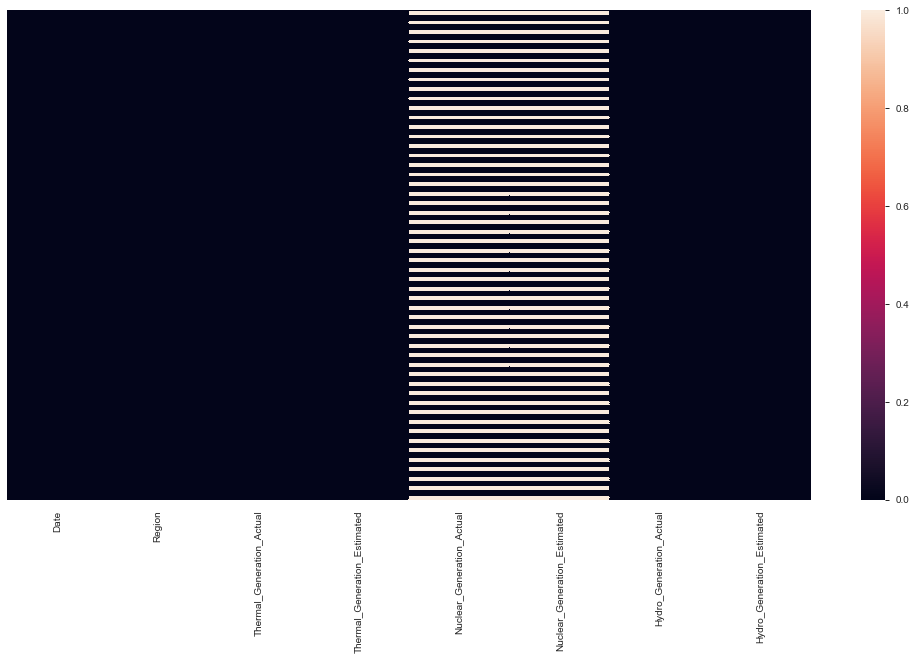

In [7]:
plt.figure(figsize = (18, 9))
sns.heatmap(df.isnull(), yticklabels = False, cbar = 'viridis')

In [8]:
Avg_Nuclear_Act = round(np.mean(df['Nuclear_Generation_Actual']), 2)
Avg_Nuclear_Est = round(np.mean(df['Nuclear_Generation_Estimated']), 2)
print('Avg_Nuclear_Act:', Avg_Nuclear_Act)
print('Avg_Nucleat_Est:', Avg_Nuclear_Est)

Avg_Nuclear_Act: 36.99
Avg_Nucleat_Est: 36.93


In [9]:
df.Nuclear_Generation_Actual.fillna(Avg_Nuclear_Act, inplace = True)
df.Nuclear_Generation_Estimated.fillna(Avg_Nuclear_Est, inplace = True)

In [10]:
df.head()

,Date,Region,Thermal_Generation_Actual,Thermal_Generation_Estimated,Nuclear_Generation_Actual,Nuclear_Generation_Estimated,Hydro_Generation_Actual,Hydro_Generation_Estimated
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,36.99,36.93,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,36.99,36.93,24.64,21.21


In [11]:
df.dtypes

Date                             object
Region                           object
Thermal_Generation_Actual        object
Thermal_Generation_Estimated     object
Nuclear_Generation_Actual       float64
Nuclear_Generation_Estimated    float64
Hydro_Generation_Actual         float64
Hydro_Generation_Estimated      float64
dtype: object

In [12]:
df['Thermal_Generation_Actual'] = df['Thermal_Generation_Actual'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Thermal_Generation_Estimated'] = df['Thermal_Generation_Estimated'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Thermal_Generation_Actual'] = df['Thermal_Generation_Actual'].apply(lambda x: float(x))
df['Thermal_Generation_Estimated'] = df['Thermal_Generation_Estimated'].apply(lambda x: float(x))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635 entries, 0 to 4634
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          4635 non-null   object 
 1   Region                        4635 non-null   object 
 2   Thermal_Generation_Actual     4635 non-null   float64
 3   Thermal_Generation_Estimated  4635 non-null   float64
 4   Nuclear_Generation_Actual     4635 non-null   float64
 5   Nuclear_Generation_Estimated  4635 non-null   float64
 6   Hydro_Generation_Actual       4635 non-null   float64
 7   Hydro_Generation_Estimated    4635 non-null   float64
dtypes: float64(6), object(2)
memory usage: 289.8+ KB


## Data Visualization

In [14]:
df.Region.unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

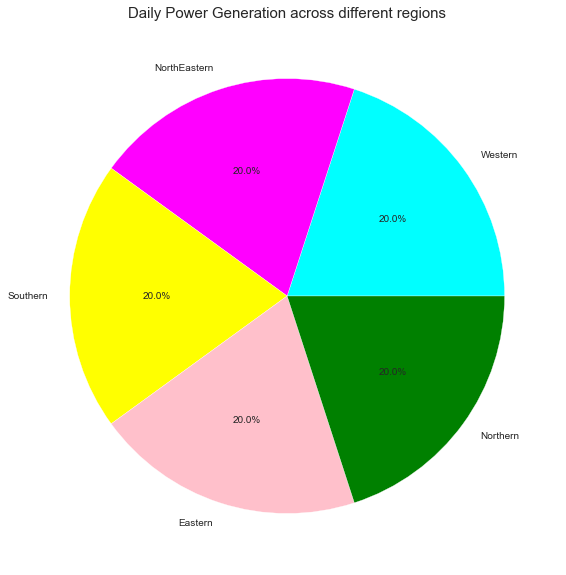

In [15]:
plt.figure(figsize = (20, 10))

labels = df.Region.value_counts().index
colors = ['cyan', 'magenta', 'yellow', 'pink', 'green']
explode = [0,0,0,0,0]
sizes = df.Region.value_counts().values

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title("Daily Power Generation across different regions", fontsize = 15)
plt.show()

### Actual Vs Estimated

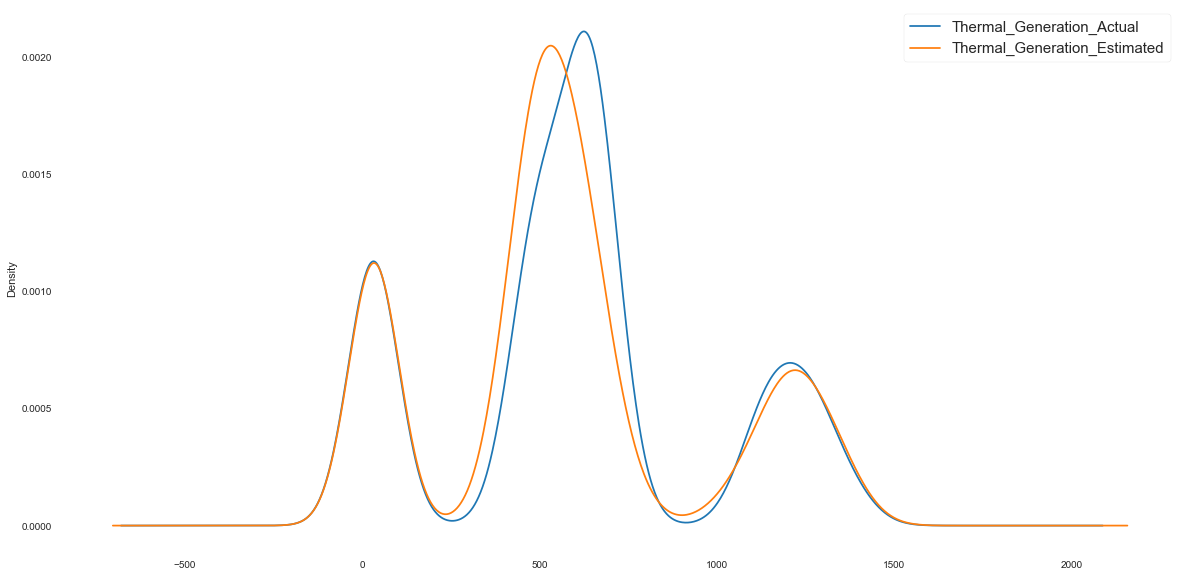

In [16]:
plt.figure(figsize = (20,10))
ax = df.Thermal_Generation_Actual.plot.kde()
ax = df.Thermal_Generation_Estimated.plot.kde()
ax.legend(fontsize = 15)
plt.show()

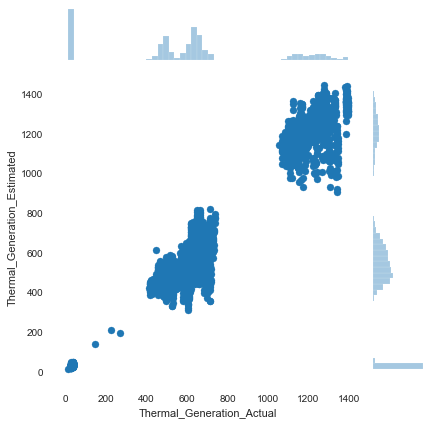

In [17]:
sns.jointplot(x = "Thermal_Generation_Actual", y = "Thermal_Generation_Estimated", data = df)

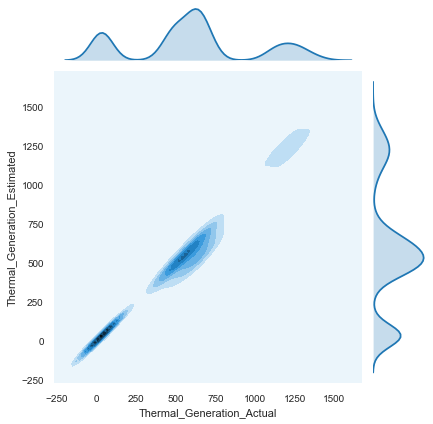

In [18]:
sns.jointplot(x = "Thermal_Generation_Actual", y = "Thermal_Generation_Estimated", data = df, kind = "kde")

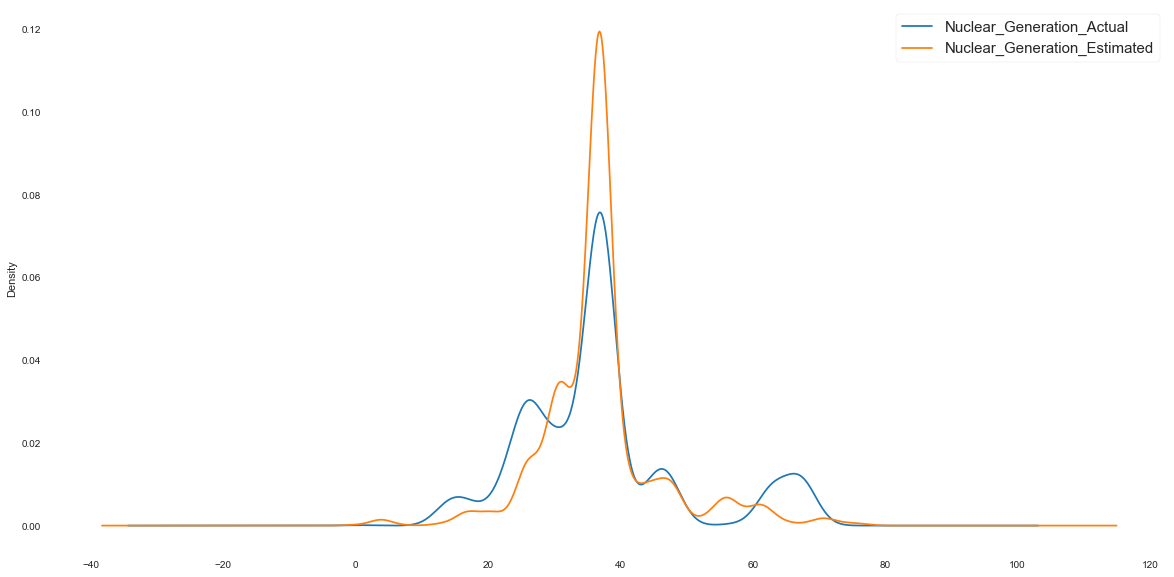

In [19]:
plt.figure(figsize = (20,10))
ax = df.Nuclear_Generation_Actual.plot.kde()
ax = df.Nuclear_Generation_Estimated.plot.kde()
ax.legend(fontsize = 15)
plt.show()

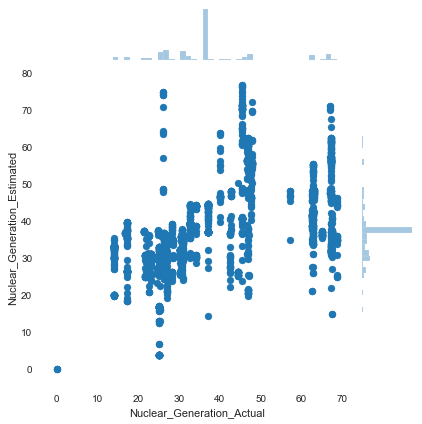

In [20]:
sns.jointplot(x = "Nuclear_Generation_Actual", y = "Nuclear_Generation_Estimated", data = df)

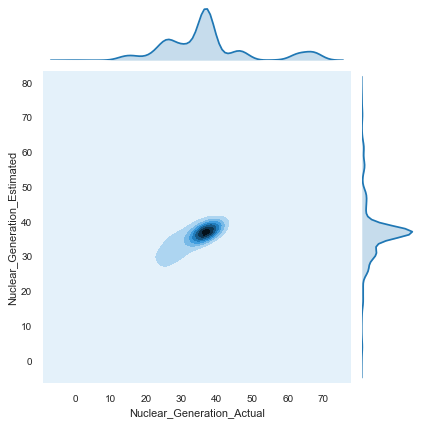

In [21]:
sns.jointplot(x = "Nuclear_Generation_Actual", y = "Nuclear_Generation_Estimated", data = df, kind = "kde")

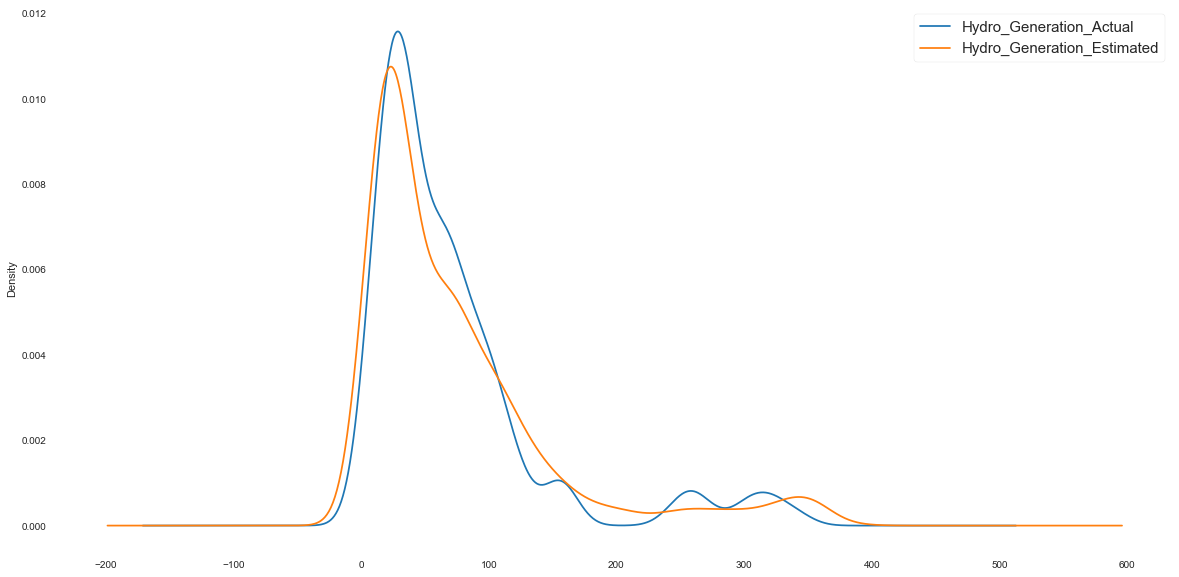

In [22]:
plt.figure(figsize = (20,10))
ax = df.Hydro_Generation_Actual.plot.kde()
ax = df.Hydro_Generation_Estimated.plot.kde()
ax.legend(fontsize = 15)
plt.show()

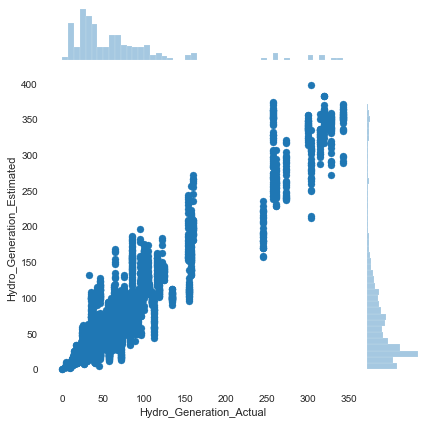

In [23]:
sns.jointplot(x = "Hydro_Generation_Actual", y = "Hydro_Generation_Estimated", data = df)

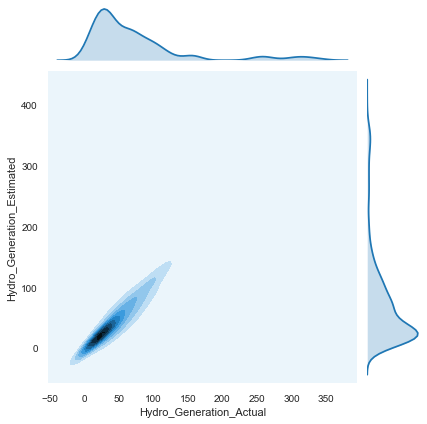

In [24]:
sns.jointplot(x = "Hydro_Generation_Actual", y = "Hydro_Generation_Estimated", data = df, kind = "kde")

In [25]:
mean_power = df.groupby(by = 'Date', as_index = False).mean()
mean_power.head()

,Date,Thermal_Generation_Actual,Thermal_Generation_Estimated,Nuclear_Generation_Actual,Nuclear_Generation_Estimated,Hydro_Generation_Actual,Hydro_Generation_Estimated
0,2017-09-01,555.582,506.478,38.448,32.608,113.484,99.538
1,2017-09-02,555.582,512.674,38.448,33.228,113.484,99.128
2,2017-09-03,555.554,506.646,38.448,33.286,113.484,94.610
3,2017-09-04,555.554,542.856,38.448,33.296,113.484,100.072
4,2017-09-05,558.170,555.930,38.448,33.314,113.484,94.032


In [26]:
act_power = df.loc[:, ["Date", "Thermal_Generation_Actual", "Nuclear_Generation_Actual", "Hydro_Generation_Actual"]]
act_power['Total_Generation_Actual'] = act_power.iloc[:,1:3].mean(axis = 1)

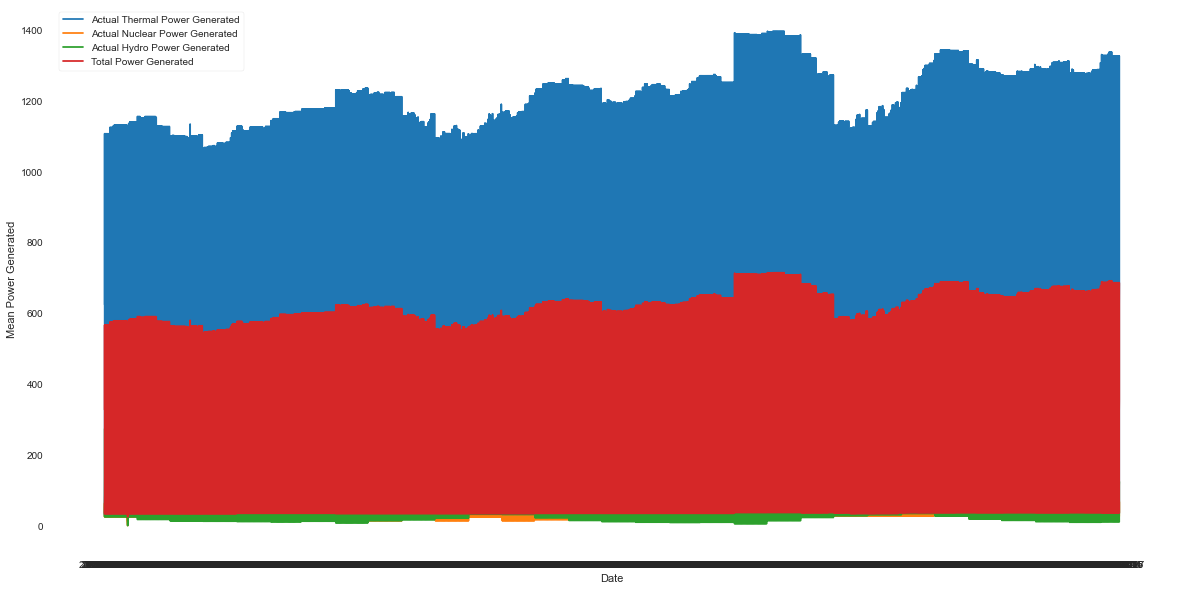

In [27]:
plt.figure(figsize = (20,10))

plt.plot(act_power['Date'], act_power['Thermal_Generation_Actual'], label = 'Actual Thermal Power Generated')
plt.plot(act_power['Date'], act_power['Nuclear_Generation_Actual'], label = 'Actual Nuclear Power Generated')
plt.plot(act_power['Date'], act_power['Hydro_Generation_Actual'], label = 'Actual Hydro Power Generated')
plt.plot(act_power['Date'], act_power['Total_Generation_Actual'], label = 'Total Power Generated')

plt.xlabel("Date")
plt.ylabel("Mean Power Generated")

plt.legend()
plt.show()

In [28]:
actual_power = ['Thermal_Generation_Actual', 'Nuclear_Generation_Actual', 'Hydro_Generation_Actual']
estimated_power = ['Thermal_Generation_Estimated', 'Nuclear_Generation_Estimated', 'Hydro_Generation_Estimated']

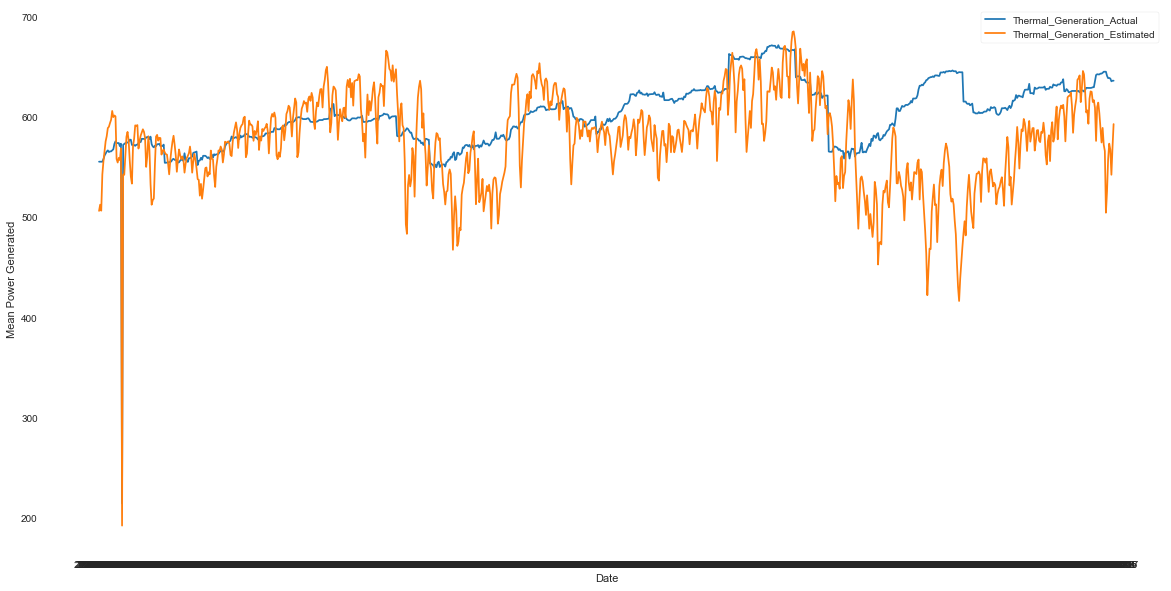

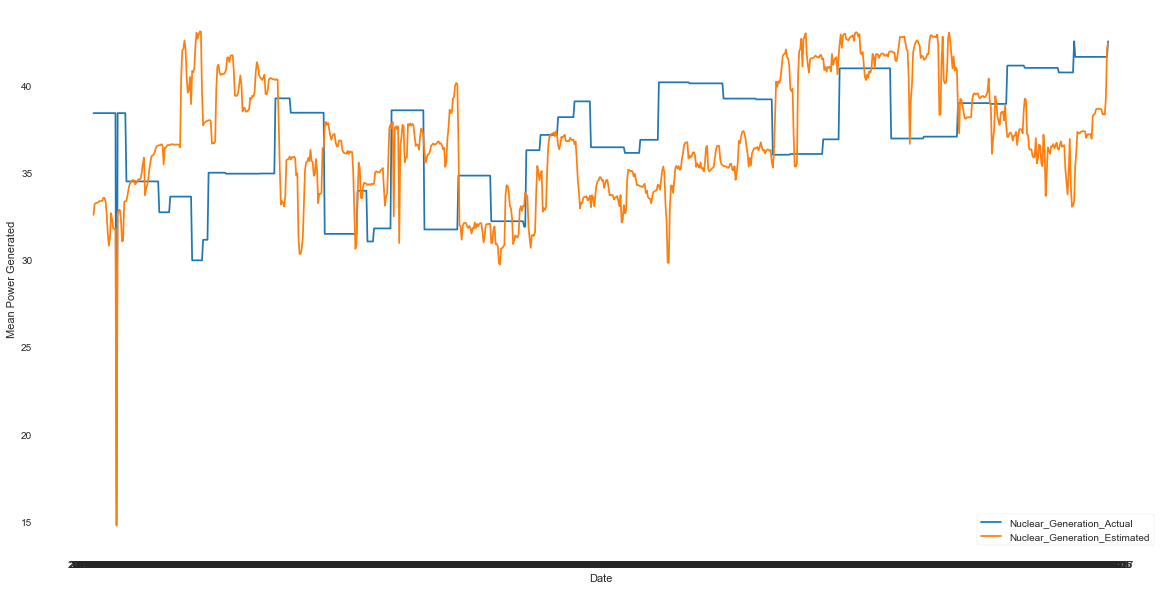

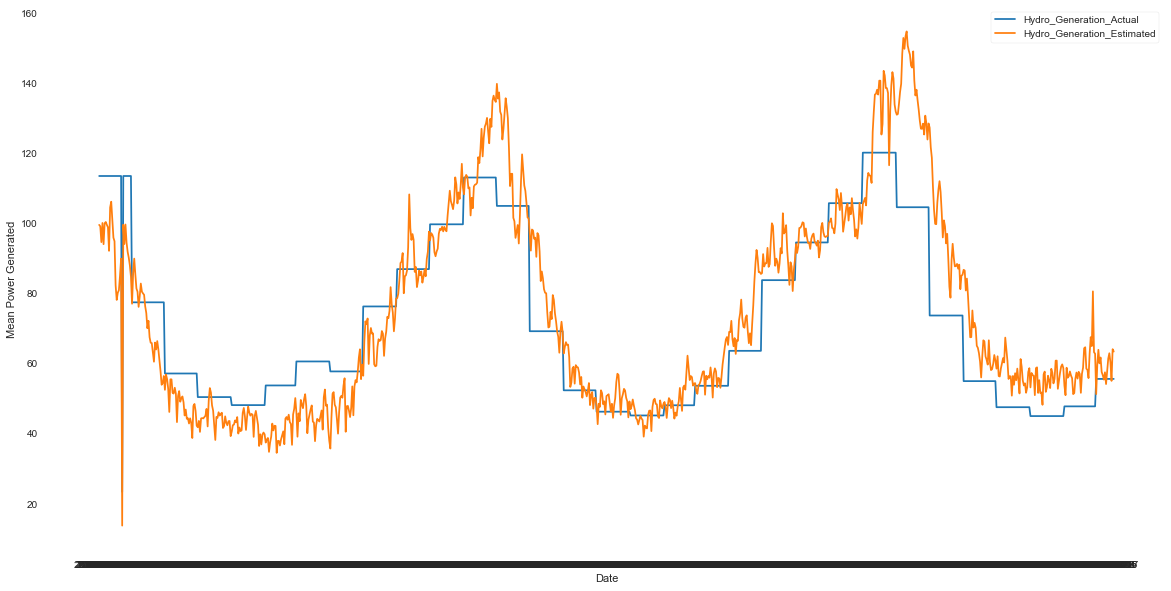

In [29]:
for idx, num in enumerate(actual_power):
    plt.figure(figsize = (20, 10))
    plt.plot(mean_power['Date'], mean_power[actual_power[idx]], label = actual_power[idx])
    plt.plot(mean_power['Date'], mean_power[estimated_power[idx]], label = estimated_power[idx])
    plt.xlabel('Date')
    plt.ylabel('Mean Power Generated')
    plt.legend()
    plt.show()

In [30]:
mean_power_per_region = df.groupby(by = ['Date', 'Region'], as_index = False).mean()
mean_power_per_region

,Date,Region,Thermal_Generation_Actual,Thermal_Generation_Estimated,Nuclear_Generation_Actual,Nuclear_Generation_Estimated,Hydro_Generation_Actual,Hydro_Generation_Estimated
0,2017-09-01,Eastern,441.02,429.39,36.99,36.93,85.94,69.36
1,2017-09-01,NorthEastern,29.11,15.91,36.99,36.93,24.64,21.21
2,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
3,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
4,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
...,...,...,...,...,...,...,...,...
4630,2020-03-17,Eastern,498.78,575.93,36.99,36.93,30.34,31.46
4631,2020-03-17,NorthEastern,34.28,34.83,36.99,36.93,10.37,4.09
4632,2020-03-17,Northern,683.49,439.09,26.23,30.37,124.40,141.16
4633,2020-03-17,Southern,639.01,619.75,67.16,67.40,81.21,77.41


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df[['Thermal_Generation_Estimated']].values
y = df[['Thermal_Generation_Actual']].values

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, Normalizer

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 0)

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
prediction = lr.predict(x_test)

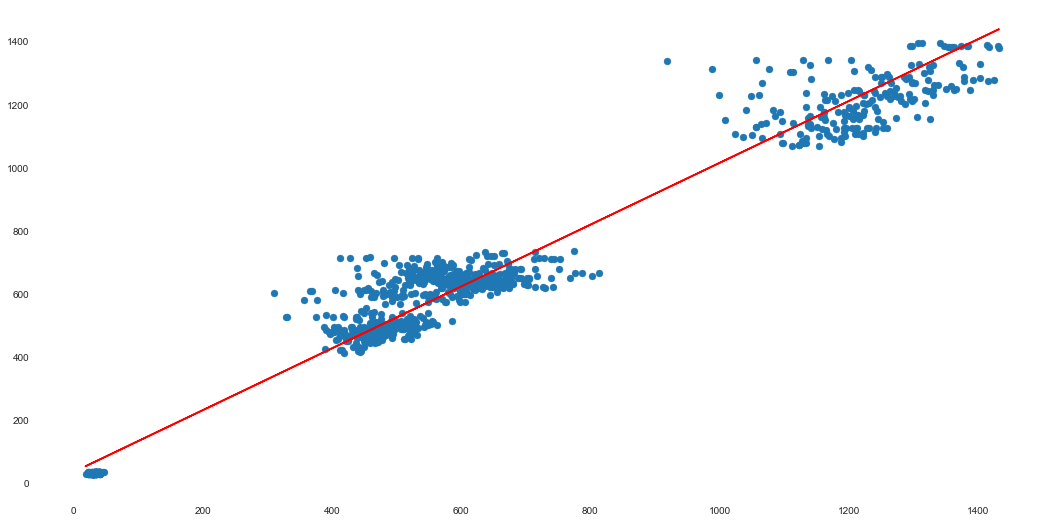

In [38]:
plt.figure(figsize = (18, 9))
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color = 'r')